In [1]:
# In this notebook:
# Learn KMeans clustering
# Check clustering with Elbow method & Silhouette plot

In [2]:
# code from Python Machine Learning by Raschka / Mirjalili

In [80]:
import matplotlib.pyplot as plt

## Create sample

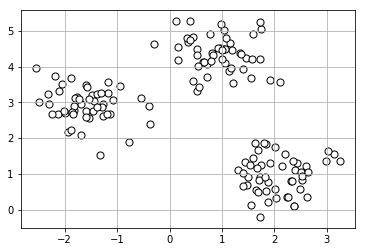

In [81]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=150, n_features=2, centers=3,
                 cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(x[:,0], x[:,1],c='white',marker='o',
            edgecolor='black', s=50)
plt.grid()

## K-means

In [96]:
# use Kmeans to classify
# Kmeans requires specifying clusters
# identifies clusters by spherical shapes

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(x)

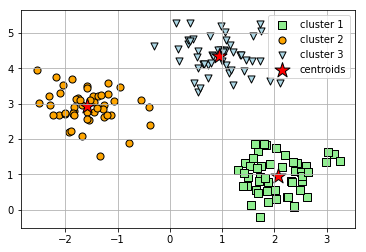

In [97]:
plt.scatter(x[y_km == 0,0], x[y_km == 0,1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(x[y_km == 1,0], x[y_km == 1,1], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(x[y_km == 2,0], x[y_km == 2,1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

In [98]:
# Books talks about fuzzy coefficient i.e. FCM
# is not implemented in Python but worth taking a look

## Elbow method

In [99]:
# as clustering is unsupervised learning,
# we many times don't know what number of clusters is best,
# here we use distortion (within-cluster SSE) to decide

print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


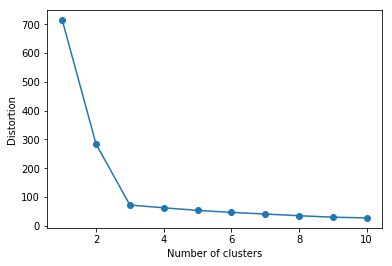

In [100]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Silhouette plots

In [103]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

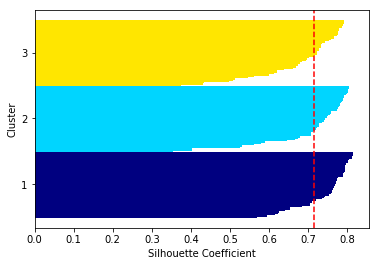

In [114]:
# plot example for GOOD number of clusters 
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

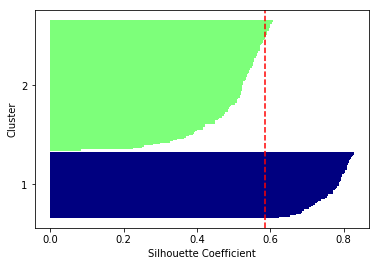

In [115]:
# plot example for BAD number of clusters
# here we use 2 clusters 

km = KMeans(n_clusters=2, init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

In [117]:
# This concludes pt 01